# <center>Day 16</center>



## 📝 Practice Questions

In [2]:
"""

    1. What is Log-Normal distribution?
    -> A distribution where the logarithm of the variable is normally distributed, commonly used to model positive, right-skewed data like income and revenue.

    2. Why does income often follow Log-Normal distribution?
    -> Income grows multiplicatively over time, so small percentage changes compound, creating right-skewed distributions with a few high earners.

    3. What is Power Law distribution?
    -> A heavy-tailed distribution where a small number of entities have extremely large values.

    4. What does heavy-tailed mean?
    -> A distribution with a long right tail where extreme values occur more frequently than in normal distributions.

    5. What is Box-Cox transformation used for?
    -> A power transformation used to reduce skewness and stabilize variance, making data closer to normal for statistical modeling.

    6. Why must data be positive for Box-Cox?
    -> Because it involves logarithmic and power operations that are undefined for zero or negative values.

    7. How does Box-Cox help in regression?
    -> It reduces skewness and variance instability, helping linear models meet normality and make good asumptions.

"""


'\n\n1. What is Log-Normal distribution?\n2. Why does income often follow Log-Normal distribution?\n3. What is Power Law distribution?\n4. What does heavy-tailed mean?\n5. What is Box-Cox transformation used for?\n6. Why must data be positive for Box-Cox?\n7. How does Box-Cox help in regression?\n'


# 📌 Mini Assignment

Scenario:
An e-commerce platform records daily seller revenue which is highly skewed.

Tasks:
1. Simulate log-normal revenue data.
2. Plot histogram.
3. Apply Box-Cox transformation.
4. Compare Q-Q plots before and after transformation.
5. Simulate power-law follower distribution.
6. Compare log-normal vs power-law visually.
7. Provide business interpretation.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

          Revenue
0    15340.693355
1    14718.340526
2    13603.577881
3    26789.528305
4     4479.331316
..            ...
995   7352.852315
996  23652.318780
997   5641.777879
998   5432.112541
999   5234.573369

[1000 rows x 1 columns]


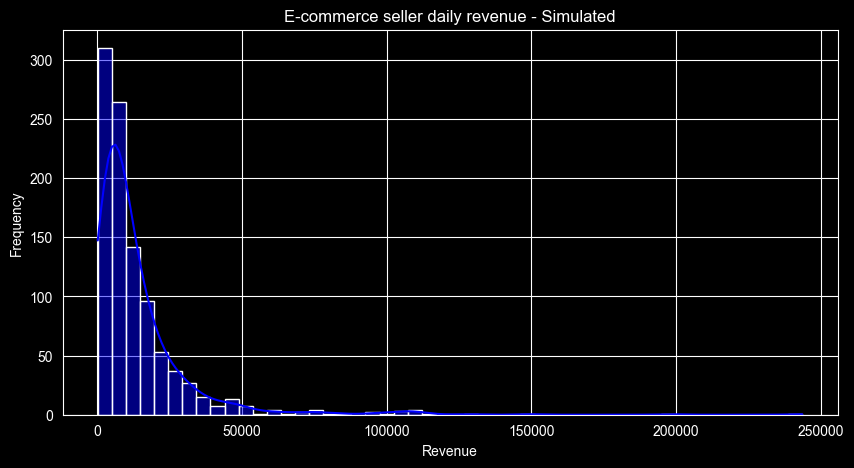

In [4]:
np.random.seed(9009)

revenue = np.random.lognormal(mean=9,sigma=1,size=1000)

df_rev = pd.DataFrame({'Revenue': revenue})
print(df_rev)

plt.figure(figsize=(10,5))
sns.histplot(df_rev['Revenue'], bins=50, color='blue', kde=True)
plt.title('E-commerce seller daily revenue - Simulated')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

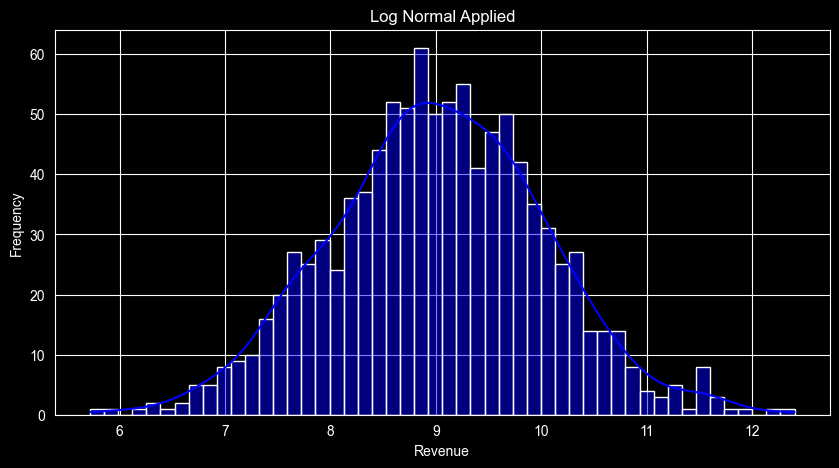

In [5]:
log_normal = np.log(revenue)

plt.figure(figsize=(10,5))
sns.histplot(log_normal, bins=50, color='blue', kde=True)
plt.title('Log Normal Applied')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

In [9]:
revenue_box_cox, lambda_val = stats.boxcox(revenue)
print(f'Lamda Value: {lambda_val}')
revenue_box_cox[:5]

Lamda Value: -0.006808055306290604


array([9.32884784, 9.29005805, 9.21625818, 9.84995268, 8.17115276])

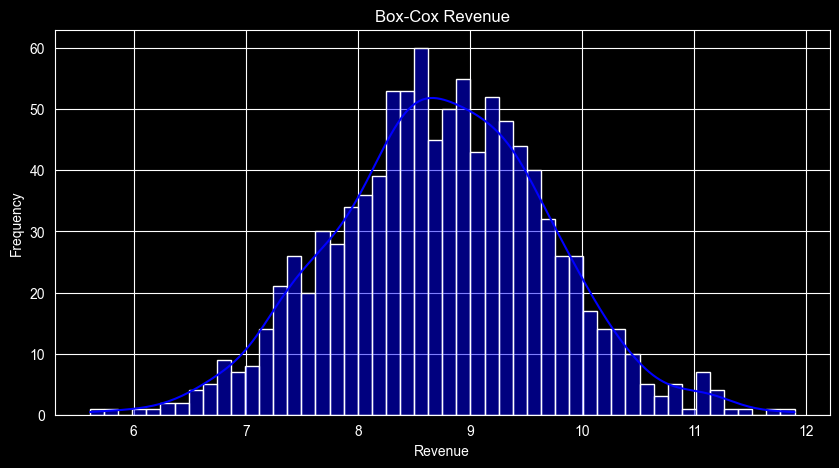

In [10]:
plt.figure(figsize=(10,5))
sns.histplot(revenue_box_cox, bins=50, color='blue', kde=True)
plt.title('Box-Cox Revenue')
plt.xlabel('Revenue')
plt.ylabel('Frequency')
plt.show()

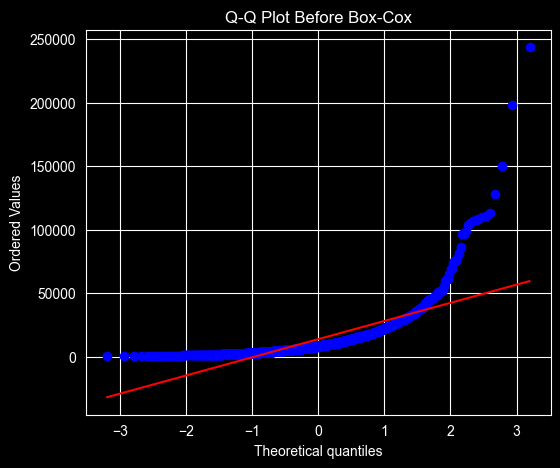

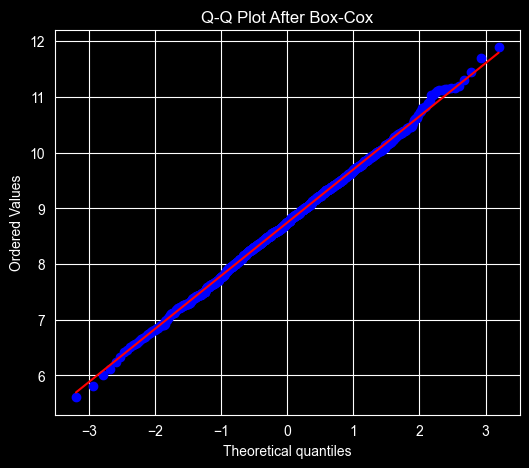

In [11]:
plt.figure(figsize=(6,5))
stats.probplot(df_rev["Revenue"], dist="norm", plot=plt)
plt.title("Q-Q Plot Before Box-Cox")
plt.show()

plt.figure(figsize=(6,5))
stats.probplot(revenue_box_cox, dist="norm", plot=plt)
plt.title("Q-Q Plot After Box-Cox")
plt.show()

In [26]:
n = 1000
alpha = 3

followers = np.random.pareto(alpha,n) * 10000

df_followers = pd.DataFrame({'Followers': followers})

df_followers.head()

,Followers
0,1512.159673
1,816.464926
2,8227.970124
3,1613.031089
4,16882.707071


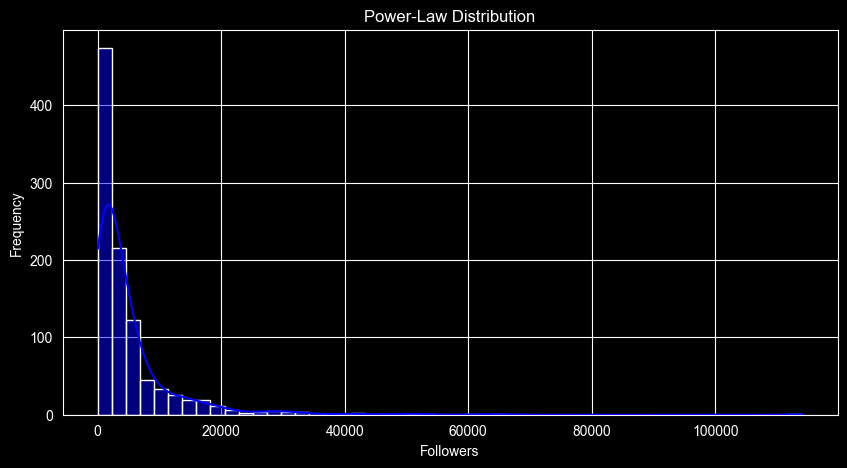

In [27]:
plt.figure(figsize=(10,5))
sns.histplot(df_followers['Followers'], bins=50, color='blue', kde=True)
plt.title('Power-Law Distribution')
plt.xlabel('Followers')
plt.ylabel('Frequency')
plt.show()

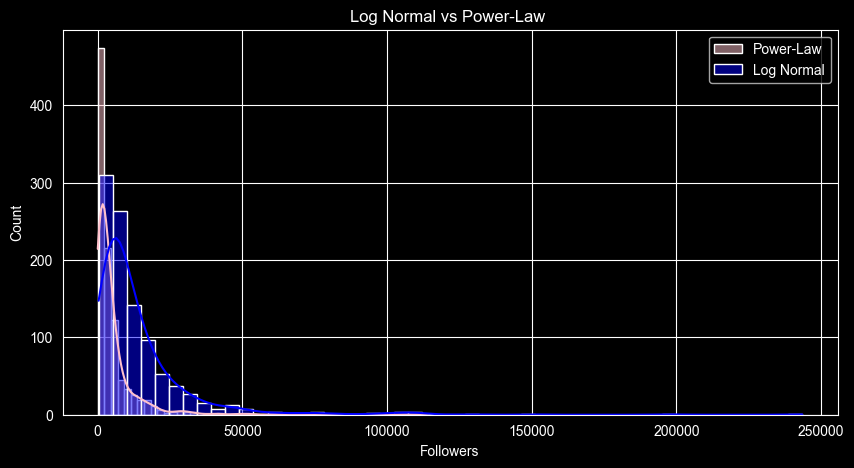

In [28]:
plt.figure(figsize=(10,5))
sns.histplot(df_followers['Followers'], bins=50, color='pink', kde=True, label = 'Power-Law')
sns.histplot(df_rev['Revenue'], bins=50, color='blue', kde=True, label = 'Log Normal')
plt.legend()
plt.title('Log Normal vs Power-Law ')
plt.show()